<a href="https://colab.research.google.com/github/Aditya1BM22CS017/6A-ML-Lab-Batch2/blob/main/1BM22CS017_Lab_6_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

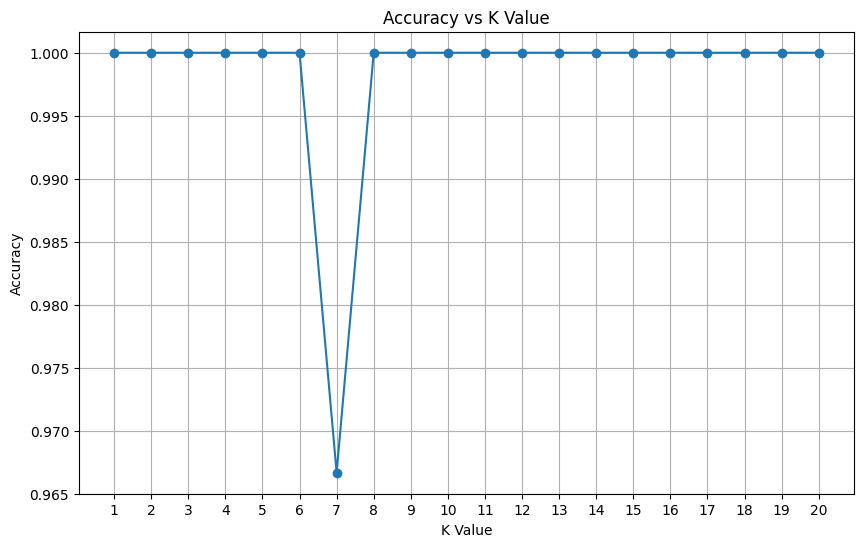


Optimal K value: 1

Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


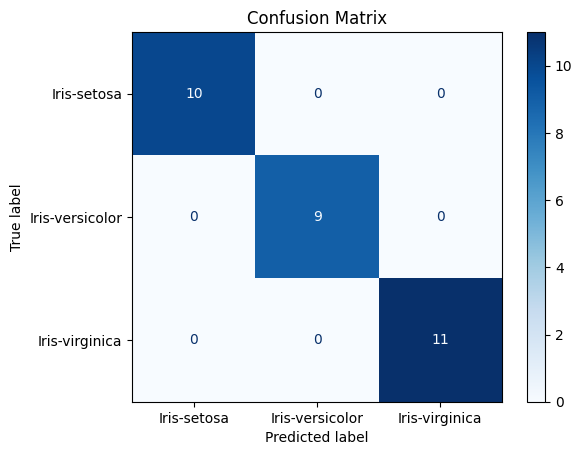


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                           classification_report, ConfusionMatrixDisplay)
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('iris.csv')

# Separate features and target
X = data.drop('species', axis=1)
y = data['species']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find the optimal k value
accuracy = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy, marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid()
plt.show()

# Choose the best k (highest accuracy)
optimal_k = np.argmax(accuracy) + 1  # +1 because range starts at 1
print(f"\nOptimal K value: {optimal_k}")

# Train the final model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

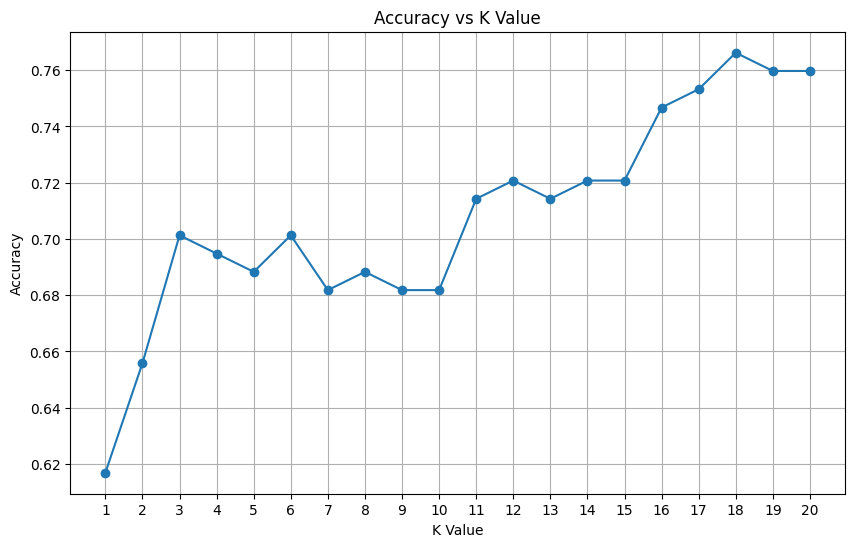

Optimal K value: 18

Accuracy: 0.7662

Confusion Matrix:
[[89 10]
 [26 29]]


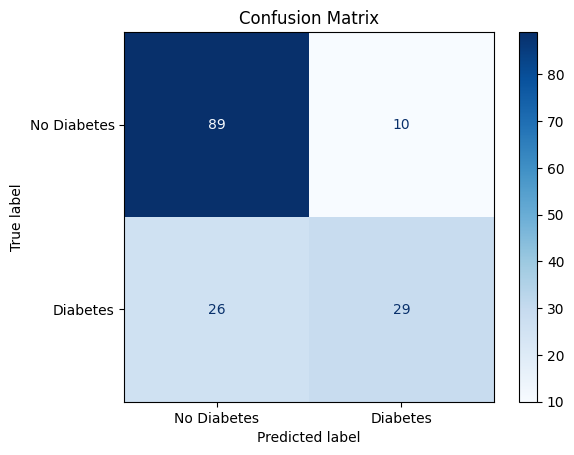


Model Evaluation:
- True Positives: 29
- True Negatives: 89
- False Positives: 10
- False Negatives: 26


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find the optimal k value
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

# Choose the best k (highest accuracy)
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"Optimal K value: {optimal_k}")

# Train the final model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Feature importance (based on model performance)
print("\nModel Evaluation:")
print(f"- True Positives: {cm[1,1]}")
print(f"- True Negatives: {cm[0,0]}")
print(f"- False Positives: {cm[0,1]}")
print(f"- False Negatives: {cm[1,0]}")

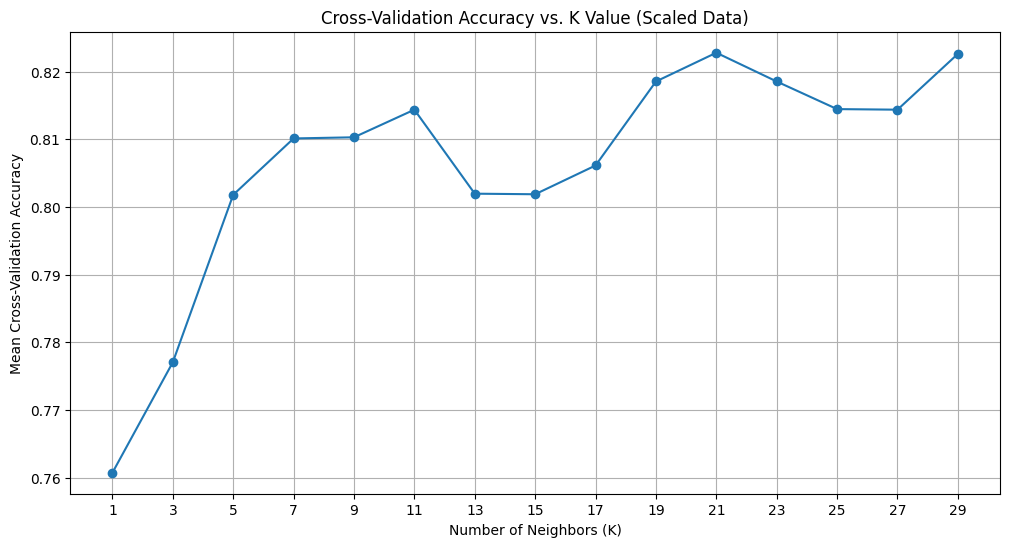


The optimal K value found through cross-validation is: 21

K-Nearest Neighbors Classifier with K = 21 (Scaled Data)
Accuracy Score on Test Data: 0.819672131147541


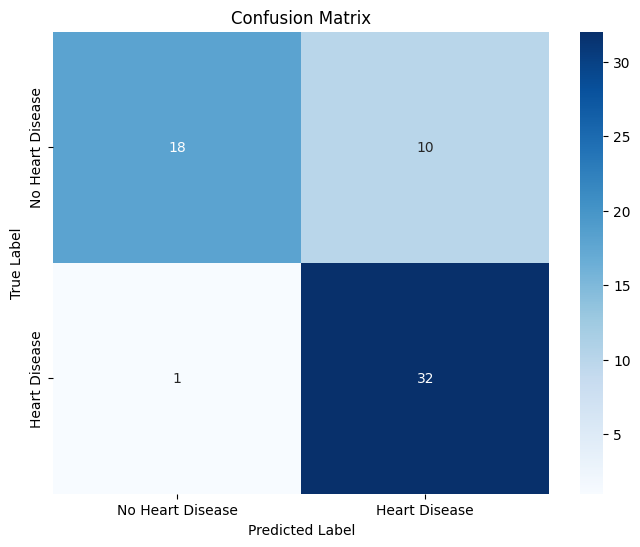


Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Load the dataset
try:
    df = pd.read_csv("heart.csv")  # Assuming the file is named 'heart.csv'
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find the best k value using cross-validation on the scaled training data
k_values = list(range(1, 31, 2))  # Try odd k values from 1 to 30
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the cross-validation scores to help choose k
plt.figure(figsize=(12, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Accuracy vs. K Value (Scaled Data)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Identify the best k value from the cross-validation results
best_k_index = cv_scores.index(max(cv_scores))
best_k = k_values[best_k_index]
print(f"\nThe optimal K value found through cross-validation is: {best_k}")

# Build and train the KNN classifier with the best k on the scaled training data
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"\nK-Nearest Neighbors Classifier with K = {best_k} (Scaled Data)")
print("Accuracy Score on Test Data:", accuracy)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Classification Report
print("\nClassification Report on Test Data:\n", report)